Classification main

lung X-rays classification by ResNet model

Link to Google drive and set up working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path="/content/drive/MyDrive/Colab Notebooks/BIA4_Group7"
os.chdir(path)
os.listdir(path)

['TB_Chest_Radiography_Database',
 'test1.py',
 'data_preparation.py',
 'processed_images.zip',
 'augmented_images.zip',
 'unet_model.py',
 '1000_external_data',
 '200_test_external',
 '200_val_external',
 '__pycache__',
 '.ipynb_checkpoints',
 'segmentation',
 'processed_images',
 'augmented_images',
 'test',
 'unet_model.pth',
 'validation.py',
 'train.py',
 'segmented_images',
 'segmented_images.zip',
 'background_image.jpg',
 'GUI.py',
 'segment_lung_xrays_to_GUI.py',
 'Dataset.py',
 'classification_data',
 'datasetprocessing.py',
 'segmentation_main.ipynb',
 'main.py',
 'loss.png',
 'best_model.pth',
 'deep_resnet_model.pth',
 'data_prepare_main.ipynb',
 'classification_main.py',
 'classification_Dataset.py',
 'resnet_model.py',
 'resnet_train.py']

In [ ]:
!python classification_main.py

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100% 97.8M/97.8M [00:00<00:00, 184MB/s]
Epoch: 1 	Training Loss: 0.683831 	Time: 1561.79s
Epoch: 2 	Training Loss: 0.643664 	Time: 63.90s
Epoch: 3 	Training Loss: 0.599024 	Time: 64.61s
Epoch: 4 	Training Loss: 0.546043 	Time: 64.40s
Epoch: 5 	Training Loss: 0.487426 	Time: 65.10s
Epoch: 6 	Training Loss: 0.419363 	Time: 64.97s
Epoch: 7 	Training Loss: 0.354287 	Time: 65.01s
Epoch: 8 	Training Loss: 0.292410 	Time: 64.57s
Epoch: 9 	Training Loss: 0.239542 	Time: 65.49s
Epoch: 10 	Training Loss: 0.198023 	Time: 67.76s
Epoch: 11 	Training Loss: 0.160640 	Time: 65.69s
Epoch: 12 	Training Loss: 0.133718 	Time: 64.59s
Epoch: 13 	Training Loss: 0.109533 	Time: 66.00s
Epoch: 14 	Training Loss: 0.091034 	Time: 65.29s
Epoch: 15 	Training Loss: 0.081612 	Time: 64.05s
Epoch: 16 	Training Loss: 0.063950 	Time: 64.47s
Epoch: 17 	Training Loss: 0.057972 	Time: 64.97s
E

Run classification_main.py to train model

Train model

Display training loss and calculate Accuracy, Precision,
Recall,
F1 Score, and perform confusion matrix.

Epoch: 1 	Training Loss: 0.682155 	Time: 67.86s
Epoch: 2 	Training Loss: 0.638191 	Time: 65.47s
Epoch: 3 	Training Loss: 0.593516 	Time: 66.71s
Epoch: 4 	Training Loss: 0.538647 	Time: 65.44s
Epoch: 5 	Training Loss: 0.472741 	Time: 64.33s
Epoch: 6 	Training Loss: 0.404321 	Time: 65.66s
Epoch: 7 	Training Loss: 0.331682 	Time: 64.56s
Epoch: 8 	Training Loss: 0.270246 	Time: 65.09s
Epoch: 9 	Training Loss: 0.218511 	Time: 65.31s
Epoch: 10 	Training Loss: 0.178107 	Time: 65.97s
Epoch: 11 	Training Loss: 0.148874 	Time: 67.25s
Epoch: 12 	Training Loss: 0.120360 	Time: 65.00s
Epoch: 13 	Training Loss: 0.101483 	Time: 66.43s
Epoch: 14 	Training Loss: 0.089984 	Time: 64.75s
Epoch: 15 	Training Loss: 0.075289 	Time: 65.35s
Epoch: 16 	Training Loss: 0.069527 	Time: 65.56s
Epoch: 17 	Training Loss: 0.057494 	Time: 65.67s
Epoch: 18 	Training Loss: 0.052565 	Time: 65.95s
Epoch: 19 	Training Loss: 0.043528 	Time: 66.02s
Epoch: 20 	Training Loss: 0.041557 	Time: 65.85s


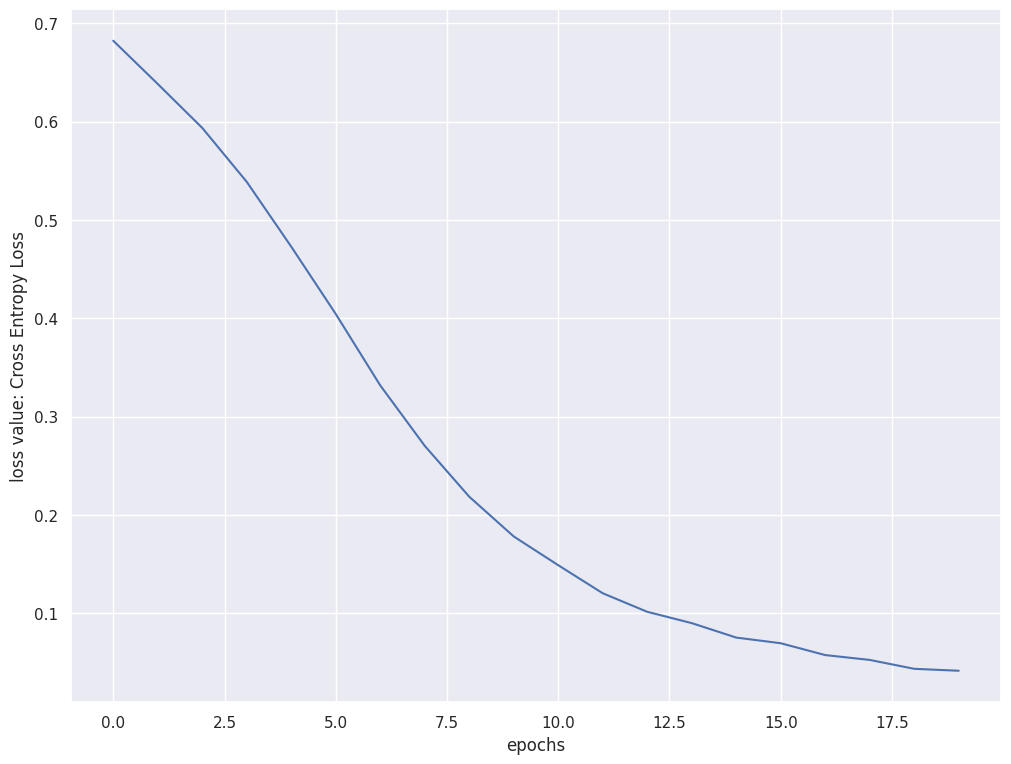

Accuracy: 0.9886
Precision: 0.9887
Recall: 0.9886
F1 Score: 0.9886


<Figure size 640x480 with 0 Axes>

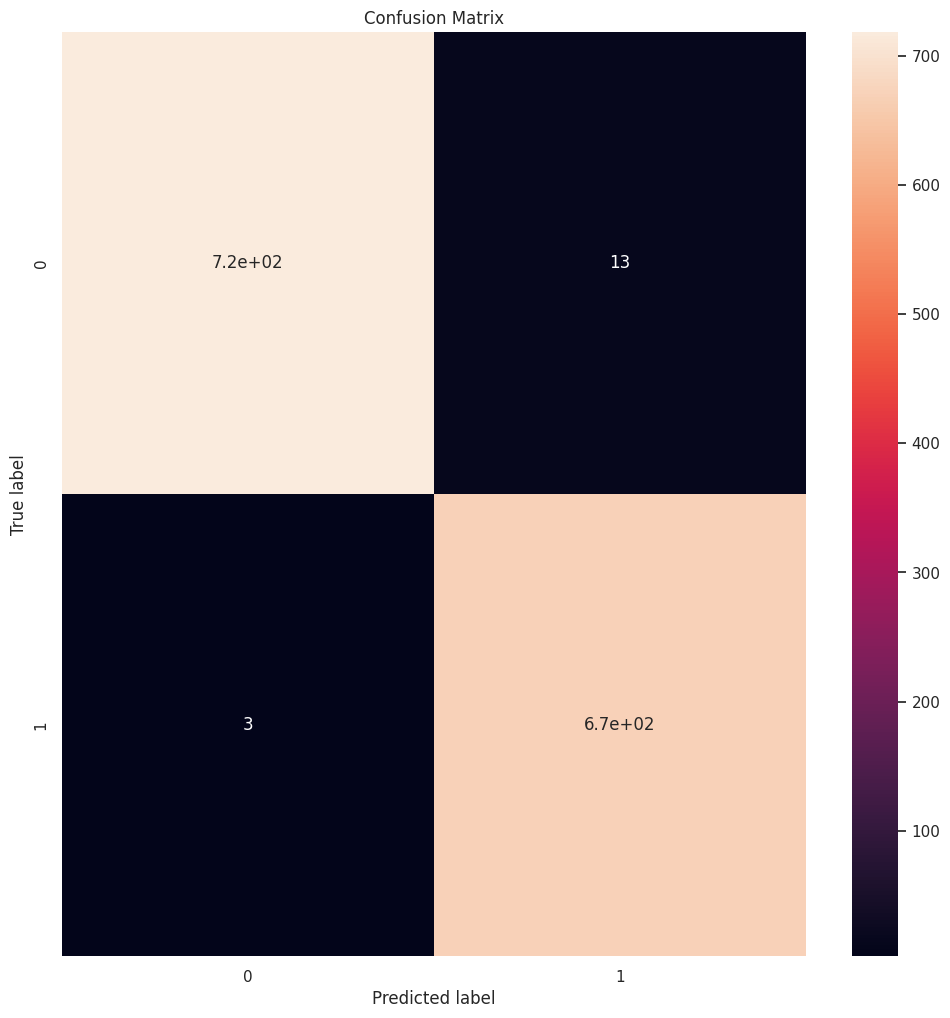

<Figure size 640x480 with 0 Axes>

In [6]:
#train classification model
import os
import torch
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader
from resnet_model import DeepResNet
from resnet_train import Training
from classification_Dataset import LearningDataset

EPOCH = 20
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_TEST = 16
LR = 1e-6
root_dir = "classification_data"
class_folders = ["normal", "tb"]


def splitting(dataset_dir: str,
              classes: list,
              test_size=0.2,
              tfm=None):
    """

    :param dataset_dir: string. Directory storing the datasets, each of which is one of the classes
    :param classes: list of string. List of classes, where the index of each class in the list is the output of the prediction.
                    E.g. ["normal", "tb"], the class "normal" is predicted as 0, and the class "tb" is predicted as 1.
    :param test_size: float. Percentage of the test dataset
    :param tfm: transforms.Compose. Transforms to be applied to the elements of the dataset
    :return: training datasets and testing datasets. Customised dataset inherited torch.utils.data.Dataset
    """
    filepaths = []
    labels = []

    for label, folder in enumerate(classes):
        full_path: str = os.path.join(dataset_dir, folder)
        img_path = [os.path.join(full_path, f) for f in os.listdir(full_path)]
        filepaths.extend(img_path)
        labels.extend([label] * len(img_path))

    train_filepaths, test_filepaths, train_labels, test_labels = \
        train_test_split(filepaths, labels, test_size=test_size, random_state=42)

    train = LearningDataset(train_filepaths, train_labels, transform=tfm)
    test = LearningDataset(test_filepaths, test_labels, transform=tfm)

    return train, test


def main():
    """
    Main function of the classification
    """
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    deep_resnet_model = DeepResNet().to(device)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    train_dataset, test_dataset = splitting(root_dir, class_folders, test_size=0.2, tfm=transform)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=False)

    trainer = Training(deep_resnet_model, train_loader, test_loader)
    trainer.set_optimizer(learning_rate=LR)
    trainer.train(num_epochs=EPOCH)
    trainer.evaluate()


if __name__ == '__main__':
    main()


Epoch: 1 	Training Loss: 0.481129 	Time: 66.13s
Epoch: 2 	Training Loss: 0.106427 	Time: 65.83s
Epoch: 3 	Training Loss: 0.035220 	Time: 65.05s
Epoch: 4 	Training Loss: 0.015328 	Time: 66.19s
Epoch: 5 	Training Loss: 0.009298 	Time: 65.03s
Epoch: 6 	Training Loss: 0.007080 	Time: 65.61s
Epoch: 7 	Training Loss: 0.005549 	Time: 65.66s
Epoch: 8 	Training Loss: 0.003703 	Time: 69.24s
Epoch: 9 	Training Loss: 0.003526 	Time: 65.53s
Epoch: 10 	Training Loss: 0.002914 	Time: 65.54s
Epoch: 11 	Training Loss: 0.001504 	Time: 66.39s
Epoch: 12 	Training Loss: 0.001592 	Time: 65.72s
Epoch: 13 	Training Loss: 0.003726 	Time: 66.22s
Epoch: 14 	Training Loss: 0.001166 	Time: 64.82s
Epoch: 15 	Training Loss: 0.002960 	Time: 66.19s
Epoch: 16 	Training Loss: 0.001361 	Time: 65.55s
Epoch: 17 	Training Loss: 0.000768 	Time: 67.58s
Epoch: 18 	Training Loss: 0.000568 	Time: 65.20s
Epoch: 19 	Training Loss: 0.001471 	Time: 64.98s
Epoch: 20 	Training Loss: 0.001582 	Time: 65.39s


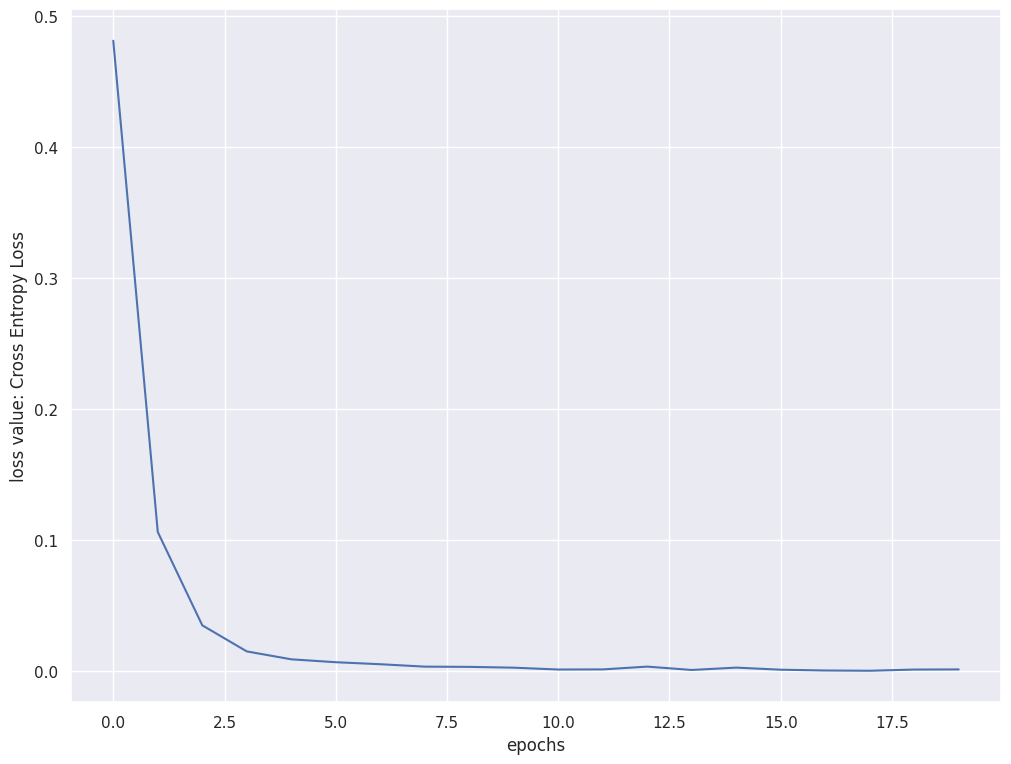

Accuracy: 0.9993
Precision: 0.9993
Recall: 0.9993
F1 Score: 0.9993


<Figure size 640x480 with 0 Axes>

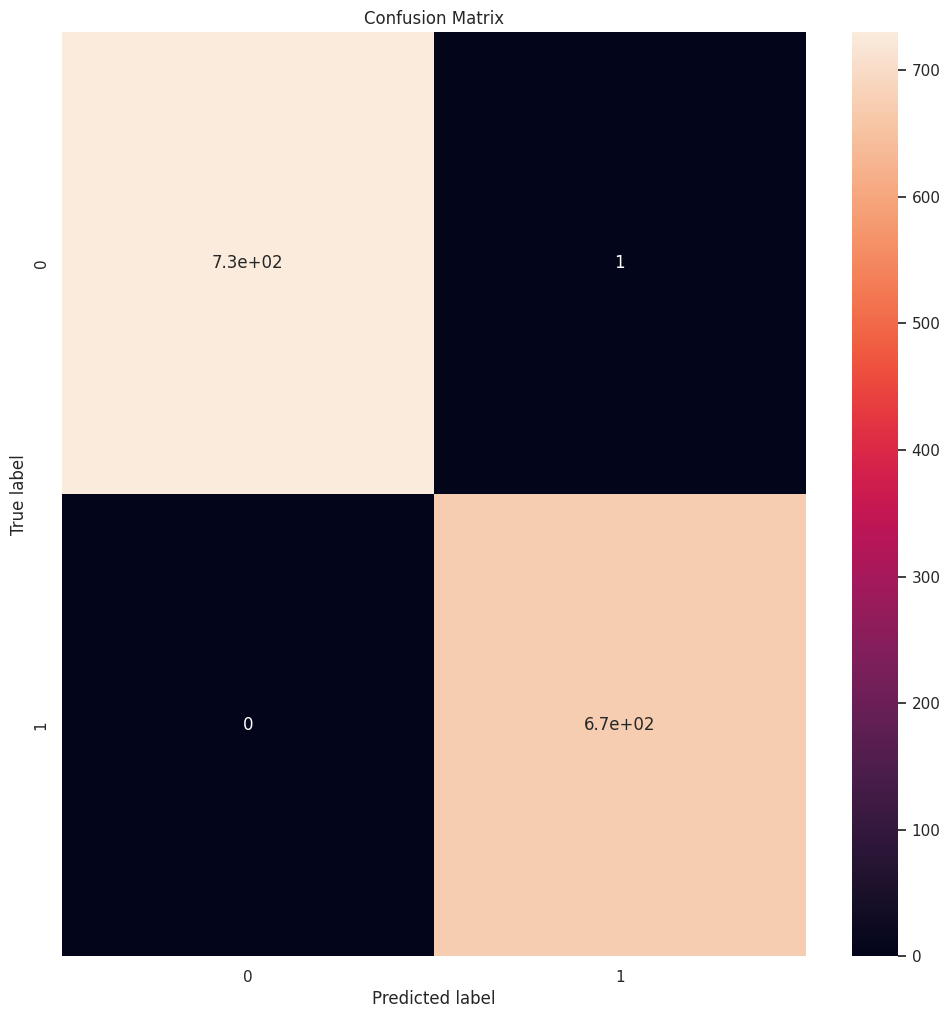

<Figure size 640x480 with 0 Axes>

In [8]:
#train classification model
import os
import torch
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader
from resnet_model import DeepResNet
from resnet_train import Training
from classification_Dataset import LearningDataset

EPOCH = 20
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_TEST = 16
LR = 1e-5
root_dir = "classification_data"
class_folders = ["normal", "tb"]


def splitting(dataset_dir: str,
              classes: list,
              test_size=0.2,
              tfm=None):
    """

    :param dataset_dir: string. Directory storing the datasets, each of which is one of the classes
    :param classes: list of string. List of classes, where the index of each class in the list is the output of the prediction.
                    E.g. ["normal", "tb"], the class "normal" is predicted as 0, and the class "tb" is predicted as 1.
    :param test_size: float. Percentage of the test dataset
    :param tfm: transforms.Compose. Transforms to be applied to the elements of the dataset
    :return: training datasets and testing datasets. Customised dataset inherited torch.utils.data.Dataset
    """
    filepaths = []
    labels = []

    for label, folder in enumerate(classes):
        full_path: str = os.path.join(dataset_dir, folder)
        img_path = [os.path.join(full_path, f) for f in os.listdir(full_path)]
        filepaths.extend(img_path)
        labels.extend([label] * len(img_path))

    train_filepaths, test_filepaths, train_labels, test_labels = \
        train_test_split(filepaths, labels, test_size=test_size, random_state=42)

    train = LearningDataset(train_filepaths, train_labels, transform=tfm)
    test = LearningDataset(test_filepaths, test_labels, transform=tfm)

    return train, test


def main():
    """
    Main function of the classification
    """
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    deep_resnet_model = DeepResNet().to(device)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    train_dataset, test_dataset = splitting(root_dir, class_folders, test_size=0.2, tfm=transform)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=False)

    trainer = Training(deep_resnet_model, train_loader, test_loader)
    trainer.set_optimizer(learning_rate=LR)
    trainer.train(num_epochs=EPOCH)
    trainer.evaluate()


if __name__ == '__main__':
    main()


Check the availability of CUDA (GPU).

In [ ]:
import torch
print(torch.cuda.is_available())

True
